In [166]:
%matplotlib inline
%autosave 0

import numpy as np
import matplotlib.pyplot as plt

## Import data

In [167]:
ex1data = np.genfromtxt("/Users/nunopires/Documents/Coursera/machine-learning-ex1/ex1/ex1data1.txt", delimiter=',')

print ex1data[:5]
print 'shape = ', ex1data.shape

[[  6.1101  17.592 ]
 [  5.5277   9.1302]
 [  8.5186  13.662 ]
 [  7.0032  11.854 ]
 [  5.8598   6.8233]]
shape =  (97, 2)


In [168]:
m = ex1data.shape[0] # number of rows / observations

X = ex1data[:, 0].reshape(m, 1) # 2D-matrix with observations as rows, single column
Y = ex1data[:, 1].reshape(m, 1)

## Plot

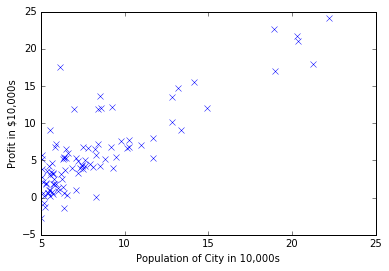

In [169]:
plt.plot(X, Y, 'x');
plt.xlabel('Population of City in 10,000s');
plt.ylabel('Profit in $10,000s');

# Gradient descent
Add a column of 1's to X (to account for intercept)

In [170]:
X = np.hstack((np.ones((m, 1)), X))
print X.shape

(97, 2)


## Initialize theta etc parameters

In [171]:
theta = np.zeros((2,1))
iterations = 1500;
alpha = 0.01;

## Compute J function

In [172]:
def computeJ(X, Y, theta):
    m = Y.size
    h = np.dot(X, theta) # θᵗX but cannot understand transpose notation, as dim: theta (2,1) and X (97, 2)
    J = np.sum((h - Y)**2) / (2*m)
    return J
    

In [173]:
computeJ(X, Y, theta)

32.072733877455676

## Gradient descent function

In [181]:
def gradDesc(theta, alpha, X, Y, num_iters):

    m = Y.size
    J_history = [None] * num_iters

    for n in range(num_iters):
        theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - Y))
        J_history[n] = computeJ(X, Y, theta) # calculate cost at every iteration
        
    return (J_history, theta)
    

In [237]:
(J_histA, paramA) = gradDesc(theta, 0.0001, X, Y, 1500)
(J_histB, paramB) = gradDesc(theta, 0.001, X, Y, 1500)
(J_histC, paramC) = gradDesc(theta, 0.01, X, Y, 1500)


### Plot J as function of iterations

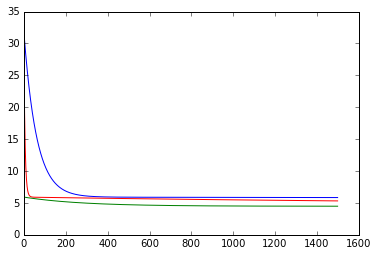

In [238]:
plt.plot(range(len(J_histA)), J_histA);
plt.plot(range(len(J_histB)), J_histB, color = 'red');
plt.plot(range(len(J_histC)), J_histC, color = 'green');

In [239]:
paramC

array([[-3.63029144],
       [ 1.16636235]])

Learning rate of 0.01 is clearly the best.

## Plot regression line

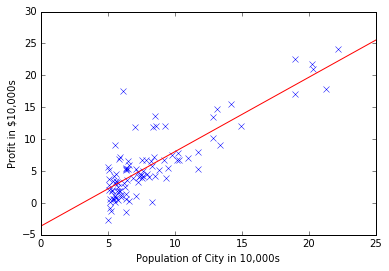

In [262]:
predX = range(26)
predY = [paramC.item(0) + paramC.item(1) * x for x in predX]

plt.plot(X[:,1], Y, 'x');
plt.plot(predX, predY, color ='red');
plt.xlabel('Population of City in 10,000s');
plt.ylabel('Profit in $10,000s');


Make predictions for different population sizes

In [284]:
for pop in [10000, 50000, 250000]:
    print 'A population of %d has a profit of %2.2f$' % (pop, np.dot([1, pop/10000.], paramC) * 10000) 

A population of 10000 has a profit of -24639.29$
A population of 50000 has a profit of 22015.20$
A population of 250000 has a profit of 255287.67$


# Extra: optimise J using advanced optimization algorithm

In [ ]:
def computeGrad(theta, X, Y):
    '''computes gradient of logistic cost function'''
    
    m = Y.size
    return np.dot(X.T,         (np.dot(X, theta) - Y))
    return np.dot(X.T, (sigmoid(np.dot(X, theta)) - Y)) / m

computeGrad(theta, X, Y) # test